<a href="https://colab.research.google.com/github/california-19/Adult_Income/blob/main/Adult_Income_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capstone 2 Project

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/Springboard/Data_Files/adult.csv"
df = pd.read_csv(path)

#Exploring the data

Let's have a look at the data first.

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Although it looks like there are no null values, actually there are. The symbol '?' is used to represent unknown values. Therefore, we need count them.

In [ ]:
print(df['workclass'].str.count("\?").sum())
print(df.shape)


1836
(32561, 15)


In [ ]:
# The columns capital.loss, capital.gain and fnlwgt are deemed unnecassary in training the model and removed from dataset.
df.drop('capital.loss', axis='columns', inplace=True)
df.drop('capital.gain', axis='columns', inplace=True)
df.drop('fnlwgt', axis='columns', inplace=True)

In [ ]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K


In [ ]:
# Missing values in workclass, native.country and occupation are removed. Not many missing entries, so we didn't lose much
z1 = df['workclass'] == '?'
z2 = df['native.country'] == '?'
z3 = df['occupation'] == '?'
df.drop(df[z1].index, inplace=True)
df.drop(df[z2].index, inplace=True)
df.drop(df[z3].index, inplace=True)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K


In [ ]:
# Since we are looking if people are making more than 50K, we have to drop part-time workers. They will not compete with full time workers.
filt = df['hours.per.week'] < 30
df.drop(df[filt].index, inplace=True)

In [ ]:
# We drop education column too, since we have number of education years
df.drop('education', axis='columns', inplace=True)
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K
8,68,Federal-gov,9,Divorced,Prof-specialty,Not-in-family,White,Female,40,United-States,<=50K


In [ ]:
# We rename some of the columns for convenience
df.rename(columns={'native.country':'country','marital.status':'m_status', 'education.num':'edu', 'hours.per.week':'hours_per_week'}, inplace=True)

In [ ]:
df[df.country != 'United-States'].value_counts()

age  workclass  edu  m_status            occupation         relationship    race                sex     hours_per_week  country    income
25   Private    2    Never-married       Priv-house-serv    Not-in-family   White               Female  40              Guatemala  <=50K     3
21   Private    1    Never-married       Farming-fishing    Not-in-family   White               Male    50              Mexico     <=50K     2
35   Private    16   Married-civ-spouse  Prof-specialty     Husband         Asian-Pac-Islander  Male    40              Taiwan     >50K      2
28   Private    6    Never-married       Handlers-cleaners  Other-relative  White               Male    40              Mexico     <=50K     2
25   Private    5    Married-civ-spouse  Machine-op-inspct  Husband         White               Male    40              Mexico     <=50K     2
                                                                                                                                            ..
43  

In [ ]:
# Let's assign non-US natives to another variable
non_US = df[df.country != 'United-States']
born_US = df[df.country == 'United-States']
non_US.head()

,age,workclass,edu,m_status,occupation,relationship,race,sex,hours_per_week,country,income
26,33,Private,2,Married-civ-spouse,Craft-repair,Not-in-family,White,Male,32,Mexico,<=50K
27,49,Private,3,Married-civ-spouse,Other-service,Husband,White,Male,40,Greece,<=50K
47,73,Self-emp-not-inc,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,40,Vietnam,<=50K
63,51,Self-emp-not-inc,13,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,40,China,>50K
67,55,Self-emp-inc,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,35,Greece,>50K


In [ ]:
print(born_US['income'].value_counts(normalize=True))
print(non_US['income'].value_counts(normalize=True))

<=50K    0.721342
>50K     0.278658
Name: income, dtype: float64
<=50K    0.792815
>50K     0.207185
Name: income, dtype: float64


In [ ]:
a = born_US['income'].value_counts(normalize=True).tolist()
b = non_US['income'].value_counts(normalize=True).tolist()
labels = ['<=50K', '>50K']

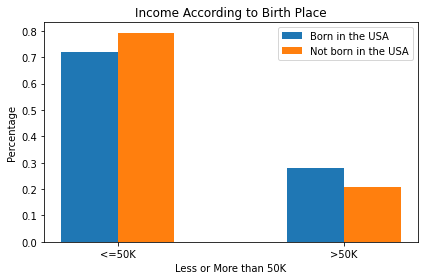

In [ ]:
x_indexes = np.arange(len(labels))
width = 0.25
#plt.style.use('fivethirtyeight')
plt.bar(x_indexes - width/2, a, width = width, label='Born in the USA')
plt.bar(x_indexes + width/2, b, width = width, label='Not born in the USA')
plt.title('Income According to Birth Place')
plt.ylabel('Percentage')
plt.xlabel('Less or More than 50K')
plt.tight_layout()
plt.legend()
plt.xticks(ticks=x_indexes, labels=labels);

It looks like non-US originated people have a slightly lower percentage of above-50K income.
Let's do some visualization to get a better understanding of our data. Let's start with histograms.

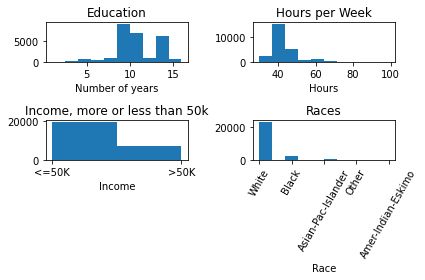

In [ ]:
plt.subplot(2,2,1)
plt.hist(df['edu'])
plt.xlabel('Number of years')
plt.title('Education')
plt.subplot(2,2,2)
plt.hist(df['hours_per_week'])
plt.xlabel('Hours')
plt.title('Hours per Week')
plt.subplot(2,2,3)
plt.hist(df['income'], bins=2)
plt.xlabel('Income')
plt.title('Income, more or less than 50k')
plt.subplot(2,2,4)
plt.hist(df['race'])
plt.xlabel('Race')
plt.title('Races')
plt.xticks(rotation=60)
plt.tight_layout()

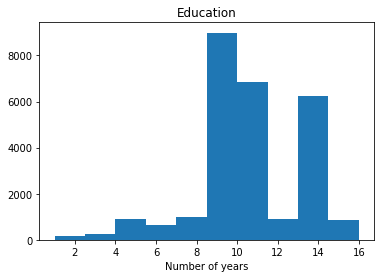

In [ ]:
plt.hist(df['edu'])
plt.xlabel('Number of years')
plt.title('Education');

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

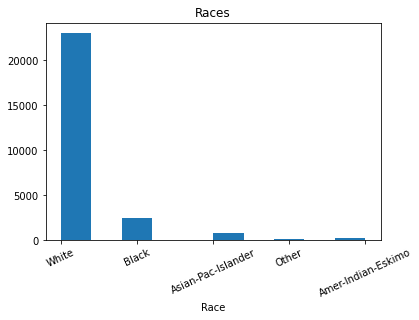

In [ ]:
plt.hist(df['race'])
plt.xlabel('Race')
plt.title('Races')
plt.xticks(rotation=25)

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

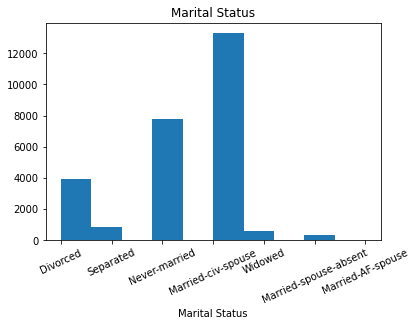

In [ ]:
plt.hist(df['m_status'])
plt.xlabel('Marital Status')
plt.title('Marital Status')
plt.xticks(rotation=25)

Text(0.5, 1.0, 'Relationship')

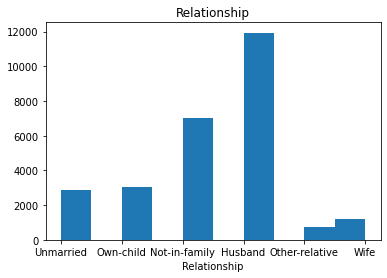

In [ ]:
plt.clf()
plt.hist(df['relationship'])
plt.xlabel('Relationship')
plt.title('Relationship')
#plt.xticks(rotation=25)

Text(0.5, 1.0, 'Gender')

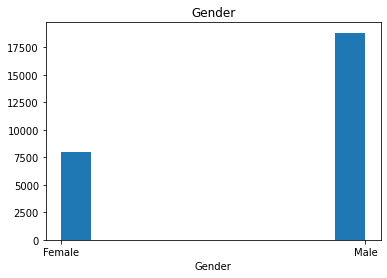

In [ ]:
plt.clf()
plt.hist(df['sex'])
plt.xlabel('Gender')
plt.title('Gender')
#plt.xticks(rotation=25)

We have a better idea about our data now. The majority of people make less than 50K and most of the races is white.

In [ ]:
v1 = df['race'].value_counts()
v2 = df['income'].value_counts()
print(v1, v2)
#plt.plot(v1, v2)

White                 23012
Black                  2488
Asian-Pac-Islander      800
Amer-Indian-Eskimo      256
Other                   212
Name: race, dtype: int64 <=50K    19480
>50K      7288
Name: income, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# We want to convert strings into numerical codes. We use LabelEncoder of sklearn for this.
le_workclass = LabelEncoder()
le_marital_status = LabelEncoder()
le_occupation = LabelEncoder()
le_relationship = LabelEncoder()
le_race = LabelEncoder()
le_sex = LabelEncoder()
le_income = LabelEncoder()

In [ ]:
df['workclass_n'] = le_workclass.fit_transform(df['workclass'])
df['m_status_n'] = le_marital_status.fit_transform(df['m_status'])
df['occupation_n'] = le_occupation.fit_transform(df['occupation'])
df['relationship_n'] = le_relationship.fit_transform(df['relationship'])
df['race_n'] = le_race.fit_transform(df['race'])
df['sex_n'] = le_sex.fit_transform(df['sex'])
df['income_n'] = le_income.fit_transform(df['income'])

In [ ]:
# After making the transformation we get rid of old data
df.drop(['workclass', 'm_status', 'occupation', 'relationship', 'race', 'sex', 'income'], axis='columns', inplace=True)
df.head()

,age,edu,hours_per_week,country,workclass_n,m_status_n,occupation_n,relationship_n,race_n,sex_n,income_n
3,54,4,40,United-States,2,0,6,4,4,0,0
4,41,10,40,United-States,2,5,9,3,4,0,0
5,34,9,45,United-States,2,0,7,4,4,0,0
6,38,6,40,United-States,2,5,0,4,4,1,0
8,68,9,40,United-States,0,0,9,1,4,0,0


In [ ]:
# We don't need country too, since we only have United States
df.drop('country', axis='columns', inplace=True)
df.head()

,age,edu,hours_per_week,workclass_n,m_status_n,occupation_n,relationship_n,race_n,sex_n,income_n
3,54,4,40,2,0,6,4,4,0,0
4,41,10,40,2,5,9,3,4,0,0
5,34,9,45,2,0,7,4,4,0,0
6,38,6,40,2,5,0,4,4,1,0
8,68,9,40,0,0,9,1,4,0,0


In [ ]:
df.workclass_n.unique()


array([2, 0, 4, 3, 5, 1, 6])

In [ ]:
# We transformed the variables but I don't know what these numbers correspond to. Therefore, I do an inverse transformation to get the mapping.
print(le_workclass.inverse_transform([0, 1, 2, 3, 4, 5, 6]))
print(le_marital_status.inverse_transform([0, 1, 2, 3, 4, 5, 6]))
print(le_occupation.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]))
print(le_relationship.inverse_transform([0, 1, 2, 3, 4, 5]))
print(le_race.inverse_transform([0, 1, 2, 3, 4]))
print(le_sex.inverse_transform([0, 1]))
print(le_income.inverse_transform([0, 1]))

['Federal-gov' 'Local-gov' 'Private' 'Self-emp-inc' 'Self-emp-not-inc'
 'State-gov' 'Without-pay']
['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']
['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']
['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']
['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']
['Female' 'Male']
['<=50K' '>50K']


### Correlations, with a Heat Map

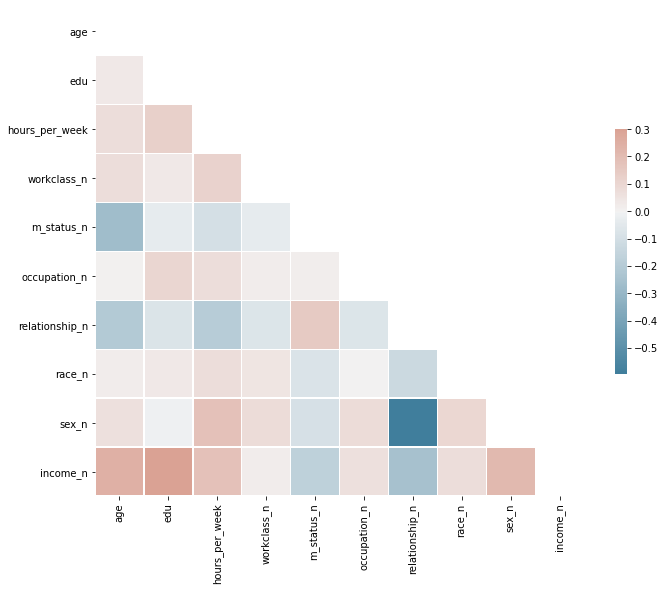

In [ ]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
k = corr.unstack().sort_values(kind='quicksort', ascending=False)
print(type(k))
k2 = k[k!=1]
k2.head(15)

<class 'pandas.core.series.Series'>


edu             income_n          0.335250
income_n        edu               0.335250
age             income_n          0.245172
income_n        age               0.245172
sex_n           income_n          0.213466
income_n        sex_n             0.213466
hours_per_week  sex_n             0.184300
sex_n           hours_per_week    0.184300
income_n        hours_per_week    0.182604
hours_per_week  income_n          0.182604
m_status_n      relationship_n    0.147531
relationship_n  m_status_n        0.147531
hours_per_week  edu               0.128816
edu             hours_per_week    0.128816
workclass_n     hours_per_week    0.117722
dtype: float64

# Decision Tree
We will keep the original dataframe df and we will choose different target variables in different decision tree models.
The inputs will change accordingly. Depending on the target and input variables, there will be 4 models, numbered from 1 to 4.
Target variables are income, edu, relationship_n, m_status_n.

In [ ]:
# Model 1
target_inc = df['income_n']
inputs_inc = df.drop('income_n', axis='columns')

In [ ]:
# Model 2
target_edu = df['edu']
inputs_edu = df.drop('edu', axis='columns')
# Model 3
target_rel = df['relationship_n']
inputs_rel = df.drop('relationship_n', axis='columns')
# Model 4
target_mar = df['m_status_n']
inputs_mar = df.drop('m_status_n', axis='columns')

In [ ]:
target_mar.unique()

array([0, 5, 4, 2, 6, 3, 1])

This is what we are going to do:
We have 10 variables. We will single out one of the four target variables, income-education-relationship-marital_status, one by one. Then we will try to explain the target variable with the remaining 9 inputs.
In the second part, (which is not done yet) we will exclude three variables, income-education-martial_status, from the dataset and try to explain them with the remaining 7 variables, one by one.

In [ ]:
from sklearn import tree

In [ ]:
# We split the data now
from sklearn.model_selection import train_test_split
X_train_inc, X_test_inc, y_train_inc, y_test_inc = train_test_split(inputs_inc, target_inc, test_size=0.2, random_state=19)
print( X_train_inc.shape, y_train_inc.shape)
print( X_test_inc.shape, y_test_inc.shape)

(21414, 9) (21414,)
(5354, 9) (5354,)


In [ ]:
# We split the data every target variable. We use a random state to make sure that we have the same random states to compare our results.
X_train_edu, X_test_edu, y_train_edu, y_test_edu = train_test_split(inputs_edu, target_edu, test_size=0.2, random_state=19)
X_train_rel, X_test_rel, y_train_rel, y_test_rel = train_test_split(inputs_rel, target_rel, test_size=0.2, random_state=19)
X_train_mar, X_test_mar, y_train_mar, y_test_mar = train_test_split(inputs_mar, target_mar, test_size=0.2, random_state=19)

In [ ]:
model_inc = tree.DecisionTreeClassifier()
model_edu = tree.DecisionTreeClassifier()
model_rel = tree.DecisionTreeClassifier()
model_mar = tree.DecisionTreeClassifier()

In [ ]:
model_inc.fit(X_train_inc, y_train_inc)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model_edu.fit(X_train_edu, y_train_edu)
model_rel.fit(X_train_rel, y_train_rel)
model_mar.fit(X_train_mar, y_train_mar)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# The model is not perfect and even the training set is not 100% accurate
model_inc.score(X_train_inc, y_train_inc)

0.9640889137947137

In [ ]:
print(f'Predicting income, score:         {model_inc.score(X_test_inc, y_test_inc)}')
print(f'Predicting education, score:      {model_edu.score(X_test_edu, y_test_edu)}')
print(f'Predicting relationship, score:   {model_rel.score(X_test_rel, y_test_rel)}')
print(f'Predicting marital status, score: {model_mar.score(X_test_mar, y_test_mar)}')

Predicting income, score:         0.7609264101606276
Predicting education, score:      0.3055659320134479
Predicting relationship, score:   0.7265595816212178
Predicting marital status, score: 0.790250280164363


### Grid Search
We can try to improve our scores with grid search. Before we can any further with confusion matrices and so, let's try grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
  'criterion':['gini', 'entropy'],
  'max_depth':range(1,10),
  'min_samples_split':range(1,10),
  'min_samples_leaf':range(1,5)
}

In [ ]:
grid_search_inc = GridSearchCV(estimator=model_inc, param_grid=parameters)
grid_search_edu = GridSearchCV(estimator=model_edu, param_grid=parameters)
grid_search_rel = GridSearchCV(estimator=model_rel, param_grid=parameters)
grid_search_mar = GridSearchCV(estimator=model_mar, param_grid=parameters)

grid_result_inc = grid_search_inc.fit(X_train_inc, y_train_inc)
grid_result_edu = grid_search_edu.fit(X_train_edu, y_train_edu)
grid_result_rel = grid_search_rel.fit(X_train_rel, y_train_rel)
grid_result_mar = grid_search_mar.fit(X_train_mar, y_train_mar)

print("Best for income      : %f using %s" % (grid_result_inc.best_score_, grid_result_inc.best_params_))
print("Best for education   : %f using %s" % (grid_result_edu.best_score_, grid_result_edu.best_params_))
print("Best for relationship: %f using %s" % (grid_result_rel.best_score_, grid_result_rel.best_params_))
print("Best for mariage     : %f using %s" % (grid_result_mar.best_score_, grid_result_mar.best_params_))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer gre

Best for income      : 0.812412 using {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 8}
Best for education   : 0.420286 using {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 9}
Best for relationship: 0.794574 using {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best for mariage     : 0.840058 using {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2}


These results are significantly better than what I had before. The power of Grid Search!

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
model_inc.predict(X_test_inc)
print(confusion_matrix(y_test_inc, model_inc.predict(X_test_inc)))
print(confusion_matrix(y_test_edu, model_edu.predict(X_test_inc)))
print(confusion_matrix(y_test_rel, model_rel.predict(X_test_inc)))
print(confusion_matrix(y_test_mar, model_mar.predict(X_test_inc)))

[[3231  627]
 [ 666  830]]
[[   0    0    0    0    0    0    0    0    5    0    0    0    0    1
     0    0]
 [   0    0    2    0    0    0    0    0   21    1    0    0    1    0
     0    0]
 [   0    0    5    0    0    1    0    0   30    5    0    2    1    0
     1    0]
 [   0    0    4    1    1    2    0    0   84    8    1    1    5    0
     0    0]
 [   0    0    5    0    1    2    1    0   56    4    2    2    5    0
     0    0]
 [   0    0   11    0    1    3    1    1   96   20    2    7    6    0
     0    0]
 [   0    0    3    0    2    2    1    3   83   16    0    6   10    2
     0    0]
 [   0    0    4    2    0    0    0    1   38   12    2    1    4    1
     0    0]
 [   0    0   93    9   28   48   14    6 1135  186   39   56  147   10
     0    1]
 [   0    2   75   10    8   39   12    3  678  128   24   38   80    6
     1    0]
 [   0    0   24    0    8    3    1    3  153   24    5   10   20    0
     0    1]
 [   0    0   17    0    2    4    1  

AxesSubplot(0.125,0.125;0.62x0.755)


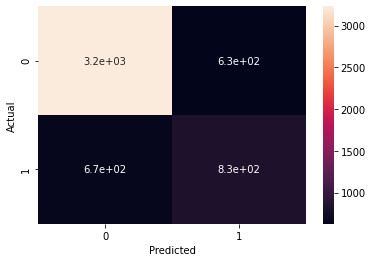

In [ ]:
import seaborn as sns
confusion_matrix_inc = pd.crosstab(y_test_inc, model_inc.predict(X_test_inc), rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(confusion_matrix_inc, annot=True))

AxesSubplot(0.125,0.125;0.62x0.755)


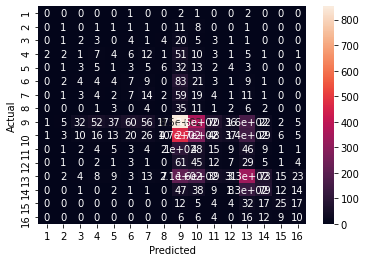

In [ ]:
confusion_matrix_edu = pd.crosstab(y_test_edu, model_edu.predict(X_test_edu), rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(confusion_matrix_edu, annot=True))

AxesSubplot(0.125,0.125;0.62x0.755)


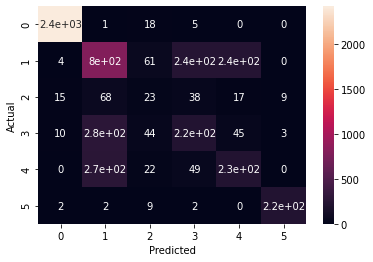

In [ ]:
confusion_matrix_rel = pd.crosstab(y_test_rel, model_rel.predict(X_test_rel), rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(confusion_matrix_rel, annot=True))

AxesSubplot(0.125,0.125;0.62x0.755)


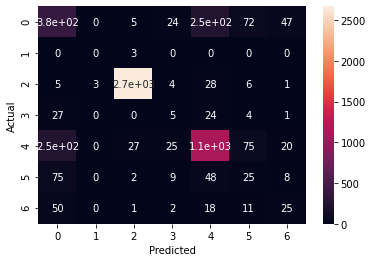

In [ ]:
confusion_matrix_mar = pd.crosstab(y_test_mar, model_mar.predict(X_test_mar), rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(confusion_matrix_mar, annot=True))

In [ ]:
#Recall Score
from sklearn.metrics import recall_score
recall_score(y_test_mar, model_mar.predict(X_test_mar), average='weighted')

0.7913709376167352

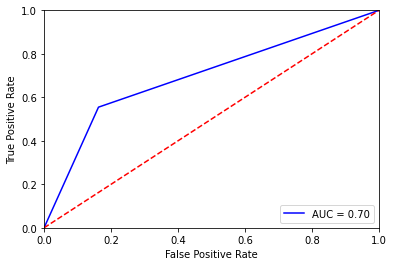

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test_inc, model_inc.predict(X_test_inc))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Conclusion of Decision Tree Model
Looking at the scores, our data is worst at predicting education level. All the other scores are very close to each other. Therefore, it would not be appropriate to rank them. But contrary to my initial guess of education being a dependent variable, our test results do not support this view. Education is more like a determinant of other outcomes, rather than being an outcome of other variables.


# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_r_inc = RandomForestClassifier()
model_r_edu = RandomForestClassifier()
model_r_rel = RandomForestClassifier()
model_r_mar = RandomForestClassifier()

In [ ]:
model_r_inc.fit(X_train_inc, y_train_inc)
model_r_edu.fit(X_train_edu, y_train_edu)
model_r_rel.fit(X_train_rel, y_train_rel)
model_r_mar.fit(X_train_mar, y_train_mar)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(model_r_inc.score(X_test_inc, y_test_inc))
print(model_r_edu.score(X_test_edu, y_test_edu))
print(model_r_rel.score(X_test_rel, y_test_rel))
print(model_r_mar.score(X_test_mar, y_test_mar))

0.8018304071722077
0.3365707881957415
0.7639148300336197
0.8294732909973851


In [ ]:
y_predicted_inc = model_r_inc.predict(X_test_inc)
y_predicted_edu = model_r_edu.predict(X_test_edu)
y_predicted_rel = model_r_rel.predict(X_test_rel)
y_predicted_mar = model_r_mar.predict(X_test_mar)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_inc = confusion_matrix(y_test_inc, y_predicted_inc)
cm_edu = confusion_matrix(y_test_edu, y_predicted_edu)
cm_rel = confusion_matrix(y_test_rel, y_predicted_rel)
cm_mar = confusion_matrix(y_test_mar, y_predicted_mar)

# Conclusion, Random Forest
Random forest scores are higher than decision tree scores for each one of them. But predicting education level is still the least successful model. One interesting finding, for decision tree and random forest models, the data is better at modeling marital status than income.

In [ ]:
cm_inc

array([[3391,  467],
       [ 594,  902]])

Text(69.0, 0.5, 'Truth')

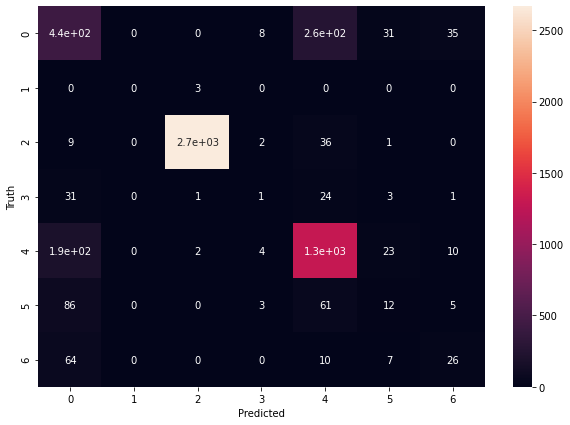

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_mar, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Xgboost

In [ ]:
import xgboost as xgb

In [ ]:
model_xgb_inc = xgb.XGBClassifier()
model_xgb_edu = xgb.XGBClassifier()
model_xgb_rel = xgb.XGBClassifier()
model_xgb_mar = xgb.XGBClassifier()

In [ ]:
model_xgb_inc.fit(X_train_inc, y_train_inc)
model_xgb_edu.fit(X_train_edu, y_train_edu)
model_xgb_rel.fit(X_train_rel, y_train_rel)
model_xgb_mar.fit(X_train_mar, y_train_mar)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print(model_xgb_inc.score(X_test_inc, y_test_inc))
print(model_xgb_edu.score(X_test_edu, y_test_edu))
print(model_xgb_rel.score(X_test_rel, y_test_rel))
print(model_xgb_mar.score(X_test_mar, y_test_mar))

0.8246171087037729
0.4206200971236459
0.7898767276802391
0.846469929025028


## Conclusion
All scores improved upon random forest.